In [2]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10

In [48]:
def format_axis_for_plot(ax, latex_label, x_lim = 20, y_lim= 20):
    ax.grid()
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim([-x_lim, x_lim])
    ax.set_ylim([-y_lim, y_lim])
    ax.set_title(latex_label)
    
    return(ax)

def compute_type_of_conic(A, B, C, D, F, G):
    
    degenerate_value = float(sp.det(sp.Matrix([[A, B/2, D/2],
                                    [B/2, C, F/2],
                                    [D/2, F/2, G]])))
    
    is_degenerate = degenerate_value == 0
    
    conic_type_value = float(sp.det(sp.Matrix([[A, B/2],
                                 [B/2, C]])))
    conic_type = "unknown"
    if conic_type_value > 0:
        conic_type = "Ellipse"
    elif conic_type_value < 0:
        conic_type = "Hyperbola"
    elif conic_type_value == 0:
        conic_type = "Parabola"
    else:
        pass
    
    print("Conic is degenerate: ", is_degenerate, "\nDeterminant value of matrix to indicate if degenerate: \n", degenerate_value)
    print("Conic type: ", conic_type, "\nDeterminant value of matrix that indicates conic type: \n", conic_type_value)
    

In the last notebook, we examined Hypterbolas, and bringing our study of conic sections of antiquity, moving to a more modern pont of view. This really begins with Cartesiang corrdinates and the idea of associating equtino in x and y with locus of points. 

This has some interesting ramifciations - linear equations, some visualised as lines, $3x-4y=7$, quadratices represe $ x^2-2xy+3y^2-5x=7$ represented conic sections.

We have also seen the general curve that can be expressed as: $ax^2+bxy+cy^2+dx+fy+g=0$ - also p0werful in relationsip between these types of theorems that we were set up could now be proved algebraically. 

IN the 17th Century, move beyond quadratic curves, to cubic curves. Just as we can try and categorise quadratic, we can also look towards categorising cubic curves, Newton tried to 

Normal form is $y^2 = ax^3 + bx^2 + cx + d$, but also elliptic cubic, nodal cupbic, cuspidal cubic, semicubical parabola, Folium of Descartsa and Fermat

Also, mechanically generated curve, Clycoid of Mersenne in 1615 and also usual sine curve (auxiliary curve associated to teh cycloid. 

Also characterised by move from curves to functinos, Euler introudced idea of $y = f(x)$, usually meaning a polynomical. 

What this says curves are complicated, and we need to be very careful how we work with them

Note that we ahave also started to work with code and we need to be more organised at this point. We will have 2 code bases, 1 of standard functions and one to capture our proofs

Wo where to next. Lets start with redefining a line, and it is natrual consider curves in te context of composite shapes. The proofs become pretty complicated so let's focus on examples for a while:

Let's consider the following example: 

In [34]:
x, y = sp.symbols('x y')
g1 = sp.Eq(2 * x**2 - 7 * x * y - 4 * y**2 + 5 * x + 7 * y - 3, 0)
g1

Eq(2*x**2 - 7*x*y + 5*x - 4*y**2 + 7*y - 3, 0)

When we factor it, something interesing arises: this polynomical which is has the form of a standard equation of a conic section factors into two lines:

In [56]:
g1.factor()

Eq((x - 4*y + 3)*(2*x + y - 1), 0)

Let's plot all of this to get a sense of how it looks. We can explicitly solve for y as follows: 

In [57]:
g2 = sp.solve(g1, y)
g2

[1 - 2*x, x/4 + 3/4]

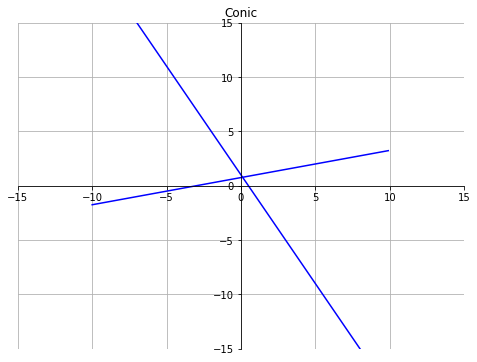

In [58]:
x_values = np.arange(-10, 10, 0.1)
y_values_1 = [g2[0].subs(x, i) for i in x_values] 
y_values_2 = [g2[1].subs(x, j) for j in x_values] 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = format_axis_for_plot(ax, "Conic", 15, 15)

p = ax.plot(x_values, y_values_1, 'b')
p = ax.plot(x_values, y_values_2, 'b')



THis just comes across as a degenerate conic. Notice we can also pass this to our function from the last section. Take the coeffiecients from the equation pass to the fucntion. 

In [51]:
g1

Eq(2*x**2 - 7*x*y + 5*x - 4*y**2 + 7*y - 3, 0)

In [55]:
compute_type_of_conic(2, -7, -4, 5, 7, -3)

Conic is degenerate:  True 
Determinant value of matrix to indicate if degenerate: 
 0.0
Conic type:  Hyperbola 
Determinant value of matrix that indicates conic type: 
 -20.25


Sure enough, this degenerate, it is a union of two lines. Let's try some other examples

In [62]:
x, y = sp.symbols('x y')
g3 = sp.Eq(x**2 - 2* x - y**2 + 1, 0)
g3

Eq(x**2 - 2*x - y**2 + 1, 0)

In [63]:
g3.factor()

Eq((x - y - 1)*(x + y - 1), 0)

We can easily plot, pass it to our function to check if its degenerate. Anotehr example:

In [65]:
g4 = sp.Eq(25 * x**2 - 4 * y**2, 0)
g4.factor()

Eq((5*x - 2*y)*(5*x + 2*y), 0)

And another:

In [67]:
g5 = sp.Eq(9 * x**2 - 12 * x * y + 4 * y**2, 0)
g5.factor()

Eq((3*x - 2*y)**2, 0)

And a final example:

In [70]:
g5 = sp.Eq(x**2 + 5 * y**2, 0)
g5.factor()

Eq(x**2 + 5*y**2, 0)

The last one does obviously factor, but has no solutions other than zero, if we ignore

So this suggests that there is some class of curves that are actually lines, but they are still somehow curves. Is a degenerate form of a curve still a curve?

Lets look at some other examples. What about 2 parallel lines. THis can be defined as another degenegerate case of a conic section. Consider the vertex, the point where all the lines meet, constructing a line. 

Let's look at an example, and we will start with a visualisation first

In [82]:
x, y = sp.symbols('x y')
g6 = sp.Eq((x - 2 * y + 1)**2, -1)
g6

Eq((x - 2*y + 1)**2, -1)

So I can assume this is conic section. However, if I try and solve it with intention to sketch it, there are no rational solutions: 

In [84]:
sp.solve(g6, y)

[x/2 + 1/2 - I/2, x/2 + 1/2 + I/2]

I can also expand to general equation form and use the fucntion: 

In [85]:
g6.expand()

Eq(x**2 - 4*x*y + 2*x + 4*y**2 - 4*y + 1, -1)

In [86]:
compute_type_of_conic(1, -4, 4, 2, -4, 0)

Conic is degenerate:  True 
Determinant value of matrix to indicate if degenerate: 
 0.0
Conic type:  Parabola 
Determinant value of matrix that indicates conic type: 
 0.0


Let's add some variations to this, which do have solutions

In [95]:
x, y = sp.symbols('x y')
g7 = sp.Eq((x - 2 * y + 1)**2, 0)
g7

Eq((x - 2*y + 1)**2, 0)

In [96]:
x, y = sp.symbols('x y')
g8 = sp.Eq((x - 2 * y + 1)**2, 1)
g8

Eq((x - 2*y + 1)**2, 1)

In [97]:
x, y = sp.symbols('x y')
g9 = sp.Eq((x - 2 * y + 1)**2, 4)
g9

Eq((x - 2*y + 1)**2, 4)

In [98]:
print(sp.solve(g7, y))
print(sp.solve(g8, y))
print(sp.solve(g9, y))

[x/2 + 1/2]
[x/2, x/2 + 1]
[x/2 - 1/2, x/2 + 3/2]


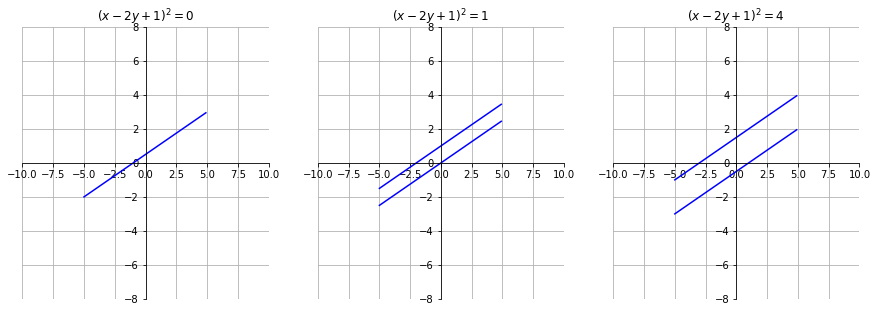

In [121]:
x_values = np.arange(-5, 5, 0.1)

g7_y_values = [sp.solve(g7, y)[0].subs(x, i) for i in x_values] 
g8_y_values_0 = [sp.solve(g8, y)[0].subs(x, i) for i in x_values] 
g9_y_values_0 = [sp.solve(g9, y)[0].subs(x, i) for i in x_values] 
g8_y_values_1 = [sp.solve(g8, y)[1].subs(x, i) for i in x_values] 
g9_y_values_1 = [sp.solve(g9, y)[1].subs(x, i) for i in x_values] 

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0] = format_axis_for_plot(ax[0], "$(x - 2 y + 1)^{2} = 0$", 10, 8)
ax[1] = format_axis_for_plot(ax[1], "$(x - 2 y + 1)^{2} = 1$", 10, 8)
ax[2] = format_axis_for_plot(ax[2], "$(x - 2 y + 1)^{2} = 4$", 10, 8)

p = ax[0].plot(x_values, g7_y_values, 'b')
p = ax[1].plot(x_values, g8_y_values_0, 'b')
p = ax[2].plot(x_values, g9_y_values_0, 'b')
p = ax[1].plot(x_values, g8_y_values_1, 'b')
p = ax[2].plot(x_values, g9_y_values_1, 'b')
